In [9]:
import pandas as pd
df = pd.read_excel("amazon.xlsx")

In [10]:
df.head()

,Star,HelpFul,Title,Review
0,5,0,looks great,Happy with it
1,5,0,Pattern did not align between the two panels.,Good quality material however the panels are m...
2,5,0,Imagery is stretched. Still fun.,Product was fun for bedroom windows.<br />Imag...
3,5,0,Que se ven elegantes muy finas,Lo unico que me gustaria es que sean un poco ...
4,5,0,Wow great purchase,Great bang for the buck I can't believe the qu...


In [11]:
#Covert reviews to lowercase
df["Review"] = df["Review"].str.lower()

In [12]:
#Delete Punctuations
import string
df["Review"] = df["Review"].fillna('')
df["Review"] = df["Review"].apply(lambda x: x.translate(str.maketrans('', '' ,string.punctuation)))

In [13]:
#Delete Numbers
df["Review"] = df["Review"].fillna('').apply(lambda x:''.join([i for i in x if not i.isdigit()])) 

In [14]:
#Delete Stopwords
import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')

In [15]:
df["Review"] = df["Review"].apply(lambda x:" ".join(x for x in str(x).split() if x not in sw)) 

In [16]:
df["Review"]

0                                                   happy
1         good quality material however panels mismatched
2       product fun bedroom windowsbr imagery bit stre...
3       lo unico que gustaria es que sean un poco mas ...
4       great bang buck cant believe quality material ...
                              ...                        
5606    great product reasonable money delivered quick...
5607                               color way panels match
5608    great studio complement entire theme studioliv...
5609                        brought beauty kids room love
5610      cute curtains sons room thick enough keep light
Name: Review, Length: 5611, dtype: object

In [17]:
#Delete Rare Words
temp_df = pd.Series(' '.join(df["Review"]).split()).value_counts() 

In [18]:
temp_df

curtains                           1890
love                               1311
room                               1113
like                               1037
beautiful                           942
                                   ... 
planner                               1
daysbrwouldn’t                        1
qualityðð»ðð»ðð»       1
believing                             1
studioliving                          1
Name: count, Length: 6795, dtype: int64

In [19]:
drops = temp_df[temp_df < 5] #select drops words

In [20]:
df["Review"] = df["Review"].apply(lambda x:" ".join( x for x in str(x).split() if x not in drops)) #combine non dropped words 

In [21]:
df["Review"]

0                                                   happy
1                    good quality material however panels
2       product fun bedroom bit stretched still materi...
3                                        lo que es que un
4       great cant believe quality material vibrant co...
                              ...                        
5606    great product reasonable money delivered quick...
5607                               color way panels match
5608    great studio entire theme area photo first cla...
5609                        brought beauty kids room love
5610      cute curtains sons room thick enough keep light
Name: Review, Length: 5611, dtype: object

In [22]:
#Tokenization
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sezgi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
#We can tokenize by using TextBlob
from textblob import Word, TextBlob
df["Review"].apply(lambda x: TextBlob(x).words)

0                                                 [happy]
1              [good, quality, material, however, panels]
2       [product, fun, bedroom, bit, stretched, still,...
3                                  [lo, que, es, que, un]
4       [great, cant, believe, quality, material, vibr...
                              ...                        
5606    [great, product, reasonable, money, delivered,...
5607                          [color, way, panels, match]
5608    [great, studio, entire, theme, area, photo, fi...
5609                  [brought, beauty, kids, room, love]
5610    [cute, curtains, sons, room, thick, enough, ke...
Name: Review, Length: 5611, dtype: object

In [24]:
#Lemmanization
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sezgi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
df["Review"] = df["Review"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [26]:
df["Review"]

0                                                   happy
1                     good quality material however panel
2       product fun bedroom bit stretched still materi...
3                                         lo que e que un
4       great cant believe quality material vibrant co...
                              ...                        
5606    great product reasonable money delivered quick...
5607                                color way panel match
5608    great studio entire theme area photo first cla...
5609                         brought beauty kid room love
5610        cute curtain son room thick enough keep light
Name: Review, Length: 5611, dtype: object

In [27]:
#Text Visualization
#find term frequency
tf = df["Review"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns = ["words","tf"]

C:\Users\sezgi\AppData\Local\Temp\ipykernel_4588\1891423368.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tf = df["Review"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
C:\Users\sezgi\AppData\Local\Temp\ipykernel_4588\1891423368.py:3: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  tf = df["Review"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
C:\Users\sezgi\AppData\Local\Temp\ipykernel_4588\1891423368.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tf = df["Review"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
C:\Users\sezgi\AppData\Local\Temp\ipykernel_4588\1891423368.py:3: FutureWarning: value_counts with arg

In [28]:
tf

,words,tf
0,happy,196.0
1,good,535.0
2,quality,888.0
3,material,561.0
4,however,78.0
...,...,...
1360,disappoint,6.0
1361,that’s,7.0
1362,coast,8.0
1363,br,18.0


In [29]:
tf.sort_values("tf", ascending= False)

,words,tf
50,curtain,2587.0
28,look,1531.0
97,love,1452.0
82,room,1126.0
137,like,1053.0
...,...,...
118,writing,5.0
955,rid,5.0
952,outstanding,5.0
1237,cartoonish,5.0


<Axes: xlabel='words'>

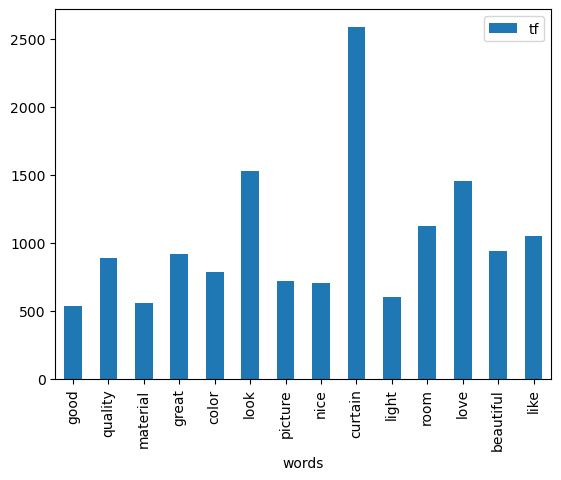

In [30]:
tf[tf["tf"] > 500].plot.bar(x="words", y="tf")

In [31]:
#Word Cloud
#We need to merge all reviews in one sentence
text = " ".join(i for i in df["Review"])

In [32]:
#text

In [33]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(text)

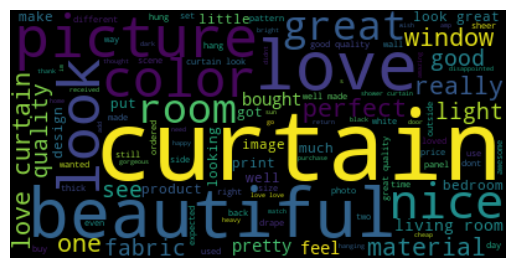

In [34]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
#If term frequency is large, word also be large in wordcloud

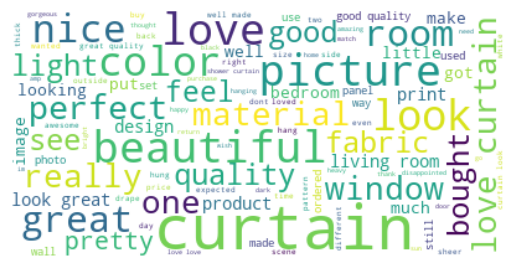

In [35]:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [36]:
wordcloud.to_file("wordcloud.png")

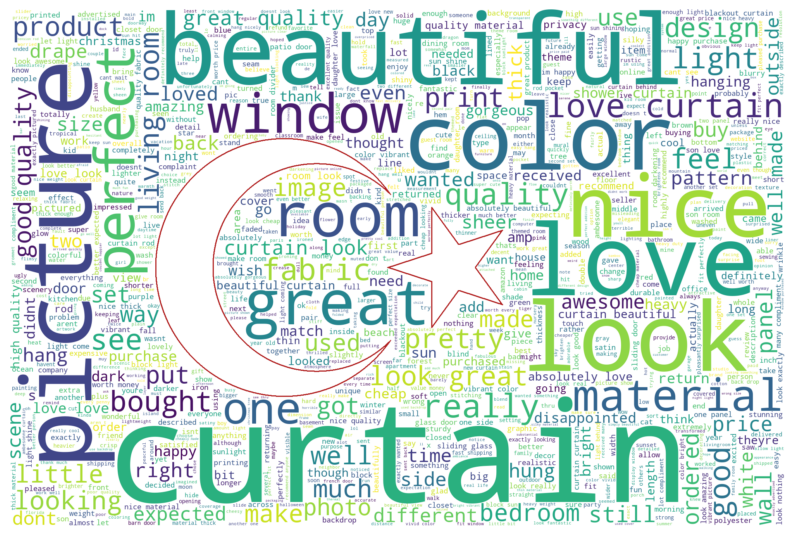

In [37]:
#Wordcloud on spesific template
import numpy as np
from PIL import Image
tr_mask = np.array(Image.open("tr.png"))
wc = WordCloud(background_color="white",
               max_words=1000,
               mask= tr_mask,
               contour_width=3,
               contour_color="firebrick")
wc.generate(text)
plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


In [38]:
#Sentiment Analysis
df["Review"]

0                                                   happy
1                     good quality material however panel
2       product fun bedroom bit stretched still materi...
3                                         lo que e que un
4       great cant believe quality material vibrant co...
                              ...                        
5606    great product reasonable money delivered quick...
5607                                color way panel match
5608    great studio entire theme area photo first cla...
5609                         brought beauty kid room love
5610        cute curtain son room thick enough keep light
Name: Review, Length: 5611, dtype: object

In [39]:
nltk.download('vader_lexicon') 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sezgi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [40]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [41]:
sia.polarity_scores("this movie is bad")

{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}

In [42]:
#If compound is negative, this is negative sentence
#If compound is positive, this is postive sentence

In [43]:
sia.polarity_scores("I like a boy")

{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}

In [44]:
df["Review"].apply(lambda x: sia.polarity_scores(x))

0       {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
1       {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compou...
2       {'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'comp...
3       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4       {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...
                              ...                        
5606    {'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'comp...
5607    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
5608    {'neg': 0.0, 'neu': 0.562, 'pos': 0.438, 'comp...
5609    {'neg': 0.0, 'neu': 0.273, 'pos': 0.727, 'comp...
5610    {'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound...
Name: Review, Length: 5611, dtype: object

In [45]:
df["polarity_score"] = df["Review"].apply(lambda x: sia.polarity_scores(x)["compound"])

In [46]:
df

,Star,HelpFul,Title,Review,polarity_score
0,5,0,looks great,happy,0.5719
1,5,0,Pattern did not align between the two panels.,good quality material however panel,0.4404
2,5,0,Imagery is stretched. Still fun.,product fun bedroom bit stretched still materi...,0.7184
3,5,0,Que se ven elegantes muy finas,lo que e que un,0.0000
4,5,0,Wow great purchase,great cant believe quality material vibrant co...,0.9042
...,...,...,...,...,...
5606,4,0,Recommend,great product reasonable money delivered quick...,0.7650
5607,5,0,"Terrible , different colors. I returned",color way panel match,0.0000
5608,5,0,Extremely pleasing,great studio entire theme area photo first cla...,0.7906
5609,5,0,Perfect,brought beauty kid room love,0.8402


In [47]:
df["sentiment_label"] = df["Review"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

In [48]:
df

,Star,HelpFul,Title,Review,polarity_score,sentiment_label
0,5,0,looks great,happy,0.5719,pos
1,5,0,Pattern did not align between the two panels.,good quality material however panel,0.4404,pos
2,5,0,Imagery is stretched. Still fun.,product fun bedroom bit stretched still materi...,0.7184,pos
3,5,0,Que se ven elegantes muy finas,lo que e que un,0.0000,neg
4,5,0,Wow great purchase,great cant believe quality material vibrant co...,0.9042,pos
...,...,...,...,...,...,...
5606,4,0,Recommend,great product reasonable money delivered quick...,0.7650,pos
5607,5,0,"Terrible , different colors. I returned",color way panel match,0.0000,neg
5608,5,0,Extremely pleasing,great studio entire theme area photo first cla...,0.7906,pos
5609,5,0,Perfect,brought beauty kid room love,0.8402,pos


In [49]:
#Examine dependent and independent variable
y = df["sentiment_label"] #dependent variable
X = df["Review"] #independent variable

In [62]:
#Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [63]:
#TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_word_vectorizer = TfidfVectorizer().fit(X_train)
X_train_tf_idf_word = tf_idf_word_vectorizer.transform(X_train)
X_test_tf_idf_word = tf_idf_word_vectorizer.transform(X_test)

In [67]:
#Sentiment Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
log_model = LogisticRegression().fit(X_train_tf_idf_word,y_train)

#predict test data
y_pred = log_model.predict(X_test_tf_idf_word)

#report prediction results by using classification report 
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         neg       0.34      0.91      0.50        87
         pos       0.99      0.89      0.94      1316

    accuracy                           0.89      1403
   macro avg       0.67      0.90      0.72      1403
weighted avg       0.95      0.89      0.91      1403



Precision model tarafından pozitif denenlerin gerçekte ne kadarı pozitif bize onu veriyor. 
Recall precisonun tam tersi gerçekte pozitif olanların kaçına pozitif denmiş 
F1 score is harmonic mean of precision and recall

In [68]:
#5-fold cross validation
cross_val_score(log_model,
                X_test_tf_idf_word,
                y_test,
                scoring="accuracy",
                cv =5).mean()

0.8567437722419928

In [72]:
#Try model in sample review
random_sample = pd.Series(df["Review"].sample(1).values) #get random review from database
print(random_sample)

0    person material texture bit disappointing like...
dtype: object


In [77]:
#Vectorize random sample with CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
random_sample_vectorizer = CountVectorizer()
new_review = CountVectorizer().fit(X_train).transform(random_sample)
pred = log_model.predict(new_review)
print(f'Review: {random_sample[0]} \n Prediction: {pred}')

Review: person material texture bit disappointing like design enough keep decide buy spend money cotton im pleased 
 Prediction: ['pos']


In [80]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier().fit(X_train_tf_idf_word,y_train)
cross_val_score(random_forest_model,
                X_test_tf_idf_word,
                y_test,
                cv=5,
                n_jobs=-1).mean()

0.8973640061006609